In [14]:
library(dplyr)
library(ggplot2)
library(zoo)
library(forecast)
library(TSA)
library(uroot)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


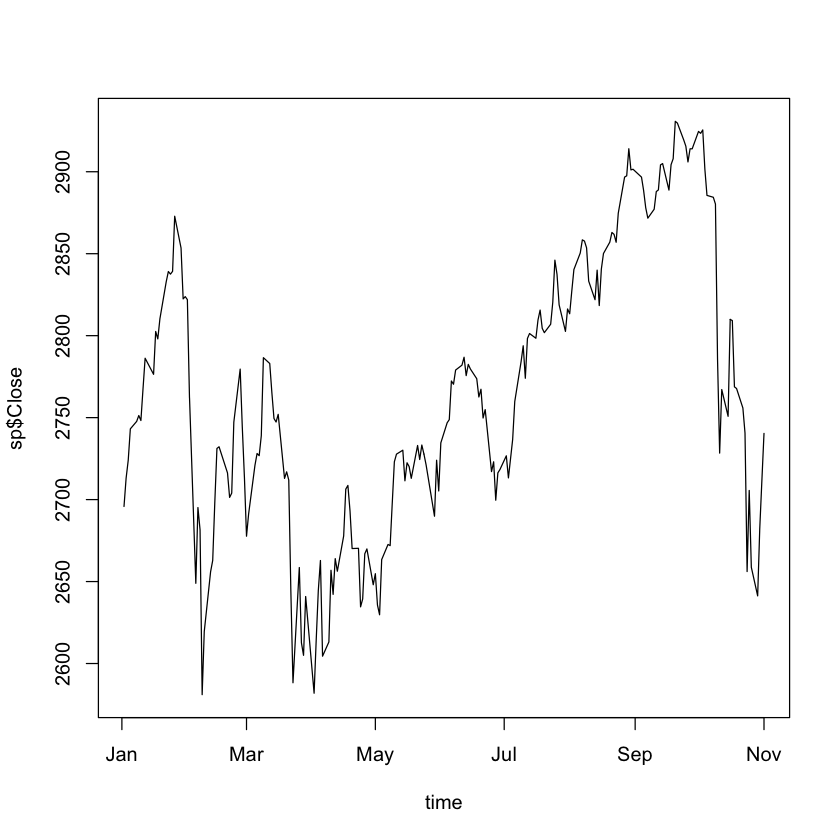

In [6]:
sp <- read.csv("GSPC.csv")
sp$Date <- as.Date(sp$Date, "%Y-%m-%d")
plot(sp$Close ~ sp$Date, xlab = "time", type ="l")

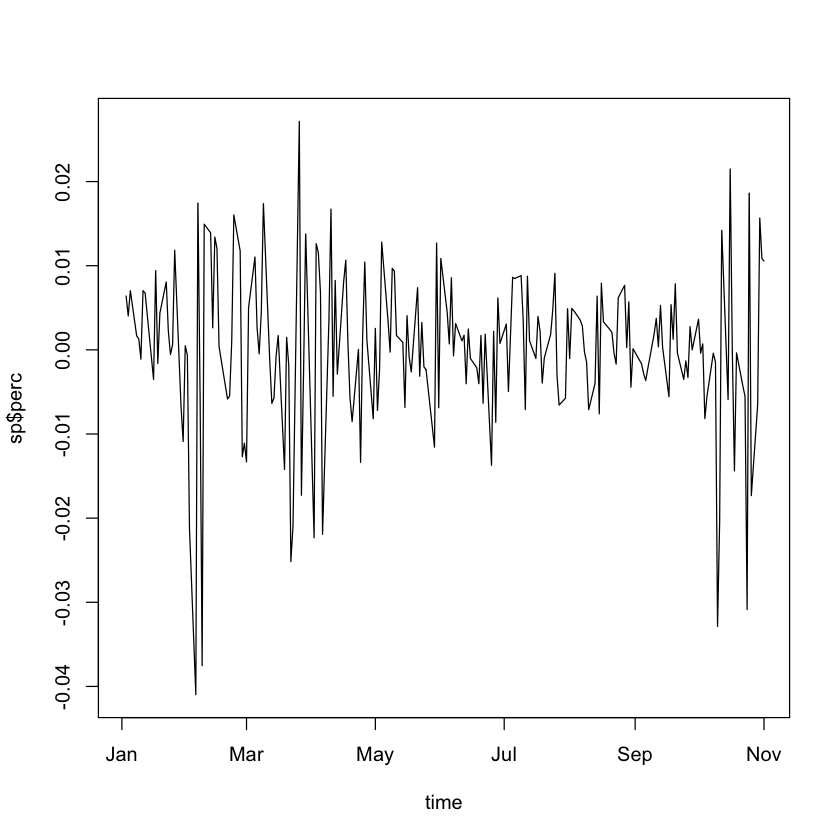

In [18]:
#Calculate Percentage Change
sp <- sp %>%
  mutate(perc = (Close - lag(Close))/lag(Close), Date = as.Date(Date))

#Percentage Change from Day-Day
plot(sp$perc ~ sp$Date, xlab = "time", type = "l")

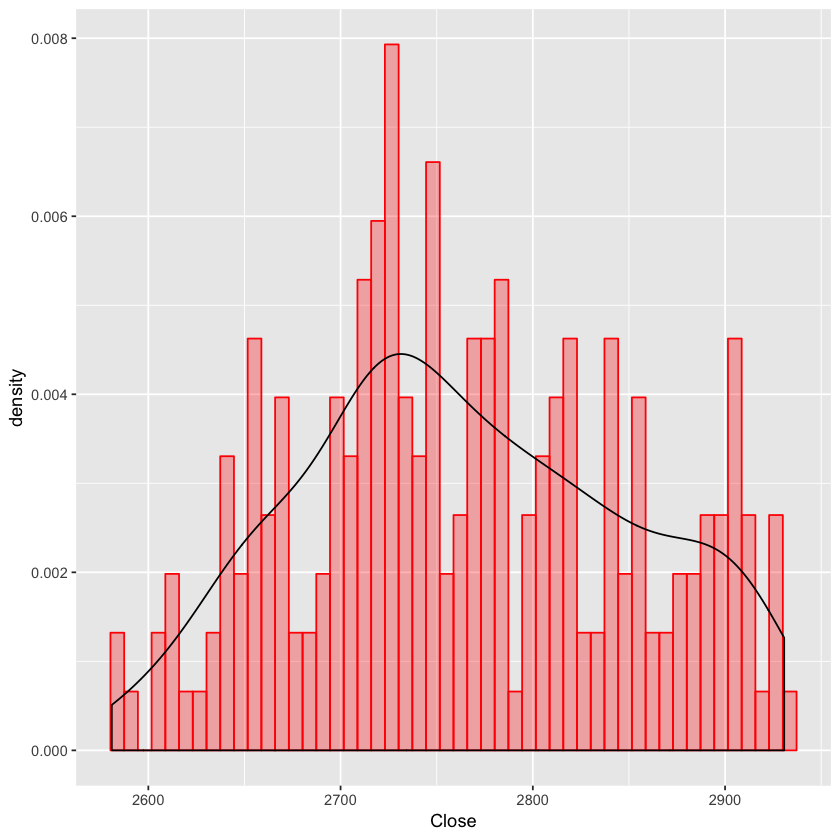

In [10]:
#Density Plot of prices
ggplot(sp, aes(Close)) + 
  geom_histogram(bins = 50, aes(y = ..density..), col = "red", fill = "red", alpha = 0.3) + geom_density()

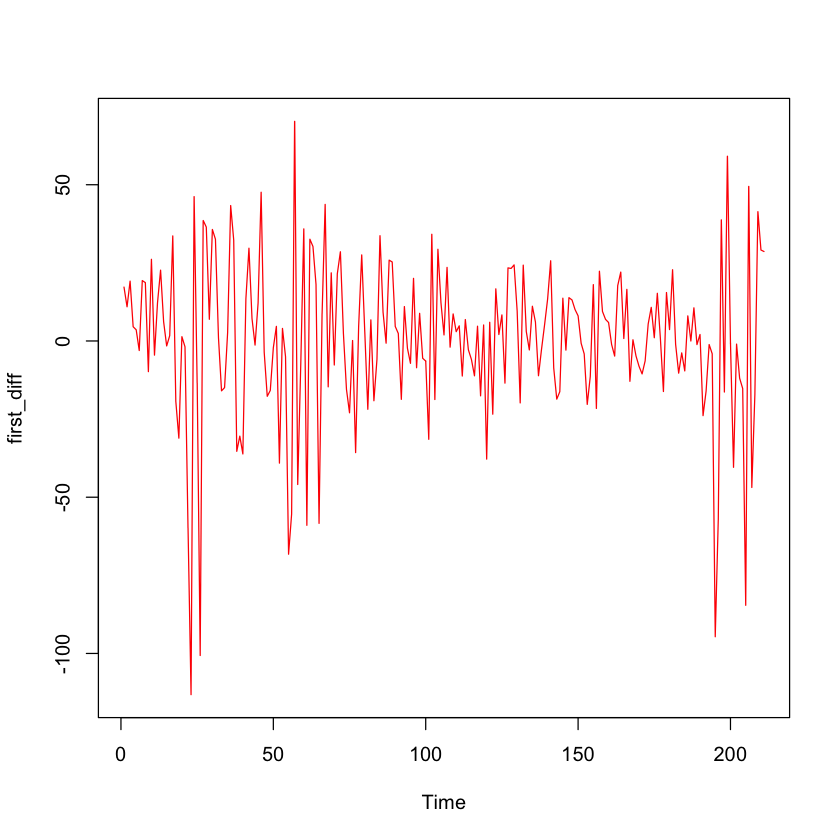

In [20]:
#First Difference
first_diff <- diff(sp$Close, differences=1)
plot.ts(first_diff, col = "red")

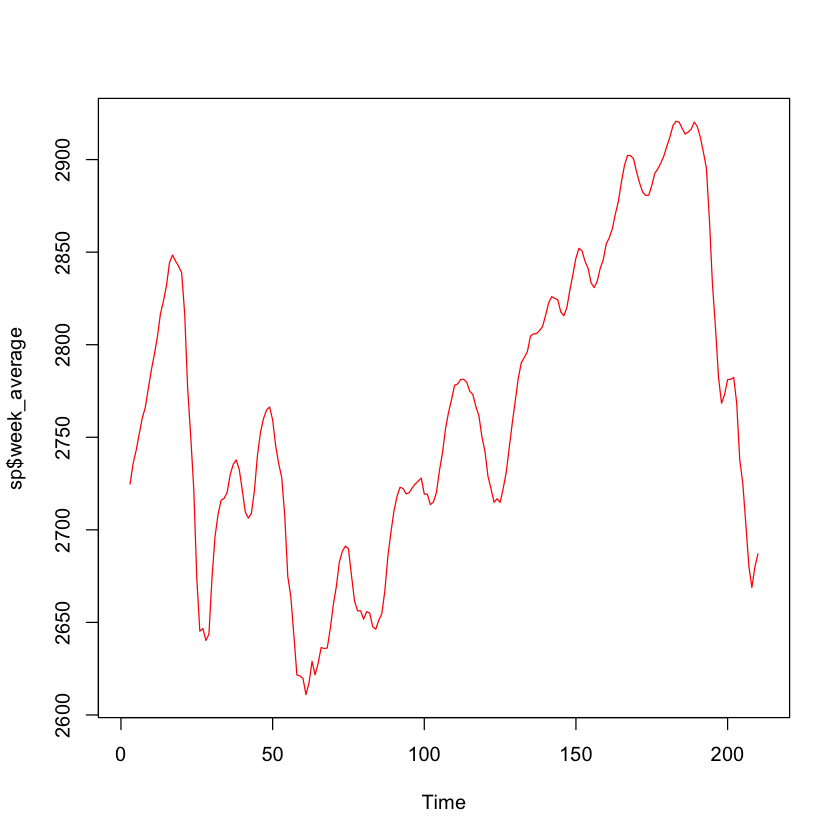

In [12]:
#Moving Average
sp <- sp %>%
  mutate(week_average = rollmean(Close, k = 5, fill = NA))

# This is done to smoothen the data a little bit
plot.ts(sp$week_average, col = "red")

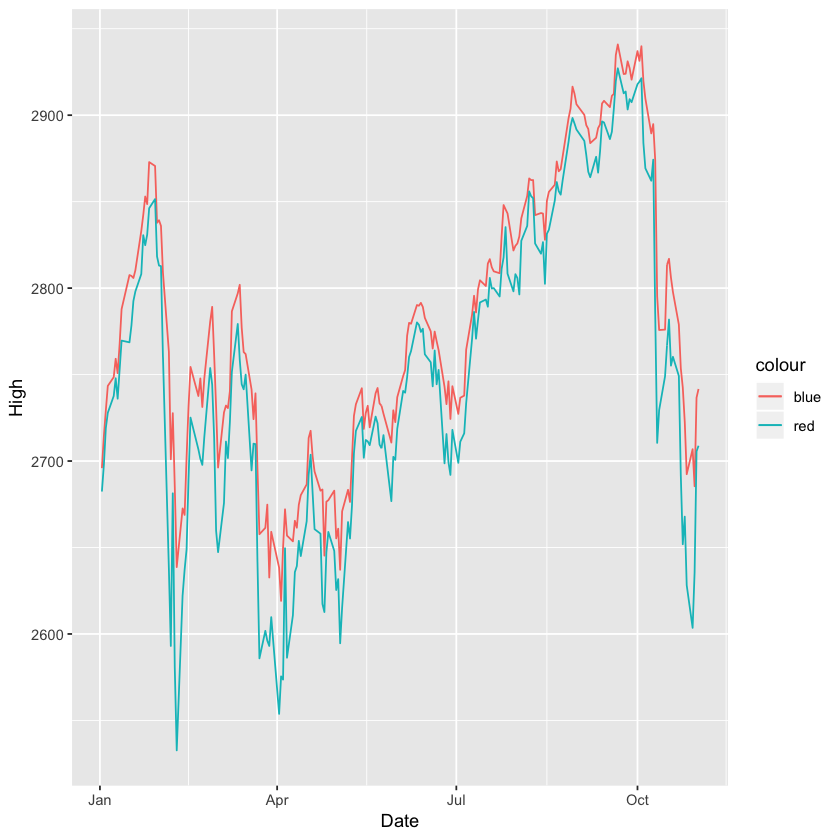

In [13]:
ggplot(sp) +
  geom_line(aes(x=Date,y=High,colour="blue")) +
  geom_line(aes(x=Date,y=Low,colour="red")) 

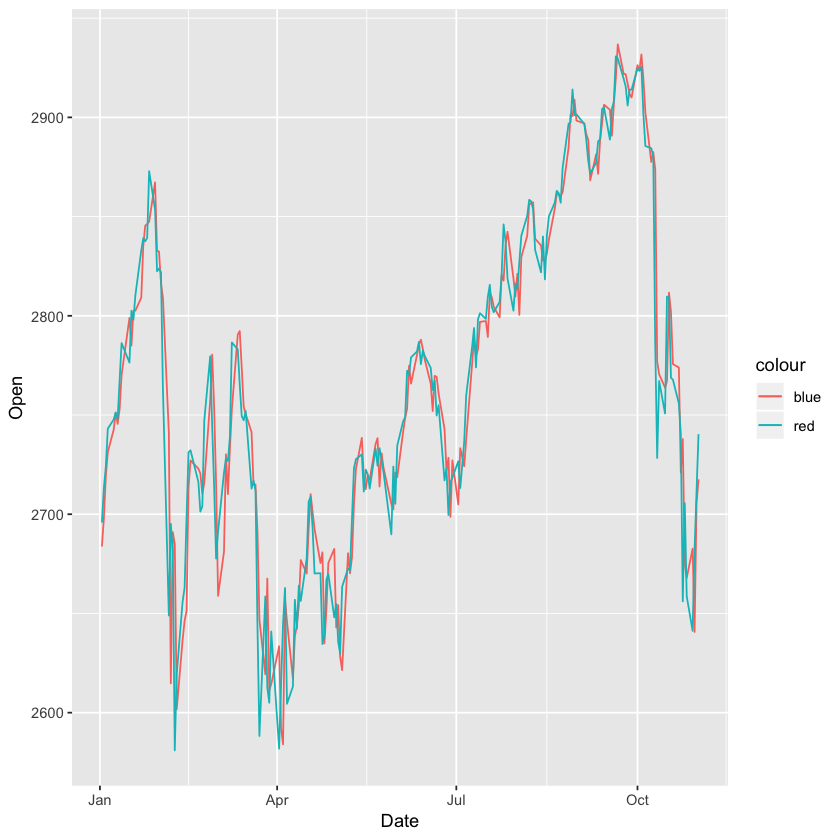

In [14]:
ggplot(sp) +
  geom_line(aes(x=Date,y=Open,colour="blue")) +
  geom_line(aes(x=Date,y=Close,colour="red")) 

In [3]:
eacf(sp)

ERROR: Error in eacf(sp): could not find function "eacf"
